    When two time series have a bidirectional relationship,
        meaning, time series t1 is a predictor of time series t2, and 
        time series t2 is also a predictor for time series t1.
    
    Then we need to take output of time series simltaneously.
    
    This brings to...
    Vector autoregression model VAR(p) models : it's the relationship of two or more time series.
    Each time series has an impact on the others, meaning the past values of one affect the other and vice versa.
    
    On general, if we can take VAR(p) as AR(p) model, with order p.

    Then VAR(p) model => using matrix notation to represent two or more series.

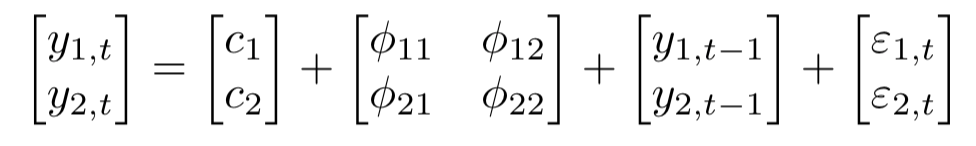

    In AR(p) model we determine the lag value which impact the present value of the series.
    
    Here we include lag value of other time series.
    
    This VAR(p) model is valid when the series is useful in prediciting one another.

    Here we have "Granger causality test" which determine whether one time series is predictive of another.
    
    Here the test is only determining whether past values of a time series are statistically significant in predicting another time series.
    
    So the test require the time series to be stationary in order for the result to be valid.
    
    Ho : Variable A does not Granger-cause Variable B
         Variable A has no predictive power for Variable B.
        p-value < 0.05 (Reject)

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reserved dataset
import statsmodels.api as sm

macro_econ_data = sm.datasets.macrodata.load_pandas().data
macro_econ_data

year  quarter    realgdp  realcons   realinv  realgovt  realdpi  \
0    1959.0      1.0   2710.349    1707.4   286.898   470.045   1886.9   
1    1959.0      2.0   2778.801    1733.7   310.859   481.301   1919.7   
2    1959.0      3.0   2775.488    1751.8   289.226   491.260   1916.4   
3    1959.0      4.0   2785.204    1753.7   299.356   484.052   1931.3   
4    1960.0      1.0   2847.699    1770.5   331.722   462.199   1955.5   
..      ...      ...        ...       ...       ...       ...      ...   
198  2008.0      3.0  13324.600    9267.7  1990.693   991.551   9838.3   
199  2008.0      4.0  13141.920    9195.3  1857.661  1007.273   9920.4   
200  2009.0      1.0  12925.410    9209.2  1558.494   996.287   9926.4   
201  2009.0      2.0  12901.504    9189.0  1456.678  1023.528  10077.5   
202  2009.0      3.0  12990.341    9256.0  1486.398  1044.088  10040.6   

         cpi      m1  tbilrate  unemp      pop  infl  realint  
0     28.980   139.7      2.82    5.8  177.146  0.00     0.00  
1     29.150   141.7      3.08    5.1  177.830  2.34     0.74  
2     29.350   140.5      3.82    5.3  178.657  2.74     1.09  
3     29.370   140.0      4.33    5.6  179.386  0.27     4.06  
4     29.540   139.6      3.50    5.2  180.007  2.31     1.19  
..       ...     ...       ...    ...      ...   ...      ...  
198  216.889  1474.7      1.17    6.0  305.270 -3.16     4.33  
199  212.174  1576.5      0.12    6.9  305.952 -8.79     8.91  
200  212.671  1592.8      0.22    8.1  306.547  0.94    -0.71  
201  214.469  1653.6      0.18    9.2  307.226  3.37    -3.19  
202  216.385  1673.9      0.12    9.6  308.013  3.56    -3.44  

[203 rows x 14 columns]

    VAR model analysis with two time series data:
        realdpi -> real disposable income
        realcons -> real consumption income

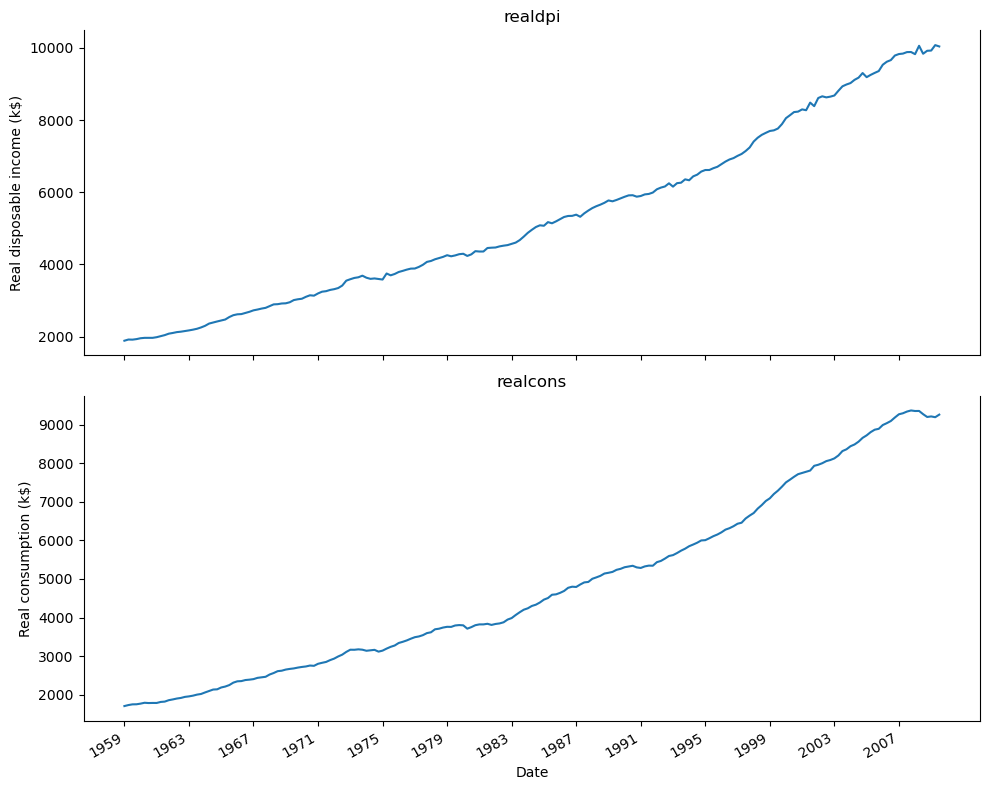

In [3]:
# Create a 2x1 grid of subplots with a specified figure size
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Create a line plot for 'realdpi' on the first subplot (ax1)
sns.lineplot(data=macro_econ_data, x=macro_econ_data.index, y='realdpi', ax=ax1)
ax1.set_xlabel('Date')  # X-axis label
ax1.set_ylabel('Real disposable income (k$)')  # Y-axis label
ax1.set_title('realdpi')  # Title for the subplot
ax1.spines['top'].set_alpha(0)  # Remove top spine (border)

# Create a line plot for 'realcons' on the second subplot (ax2)
sns.lineplot(data=macro_econ_data, x=macro_econ_data.index, y='realcons', ax=ax2)
ax2.set_xlabel('Date')  # X-axis label
ax2.set_ylabel('Real consumption (k$)')  # Y-axis label
ax2.set_title('realcons')  # Title for the subplot
ax2.spines['top'].set_alpha(0)  # Remove top spine (border)

# Define custom x-axis tick positions and labels
xticks = np.arange(0, len(macro_econ_data), 16)
xtick_labels = np.arange(1959, 2010, 4)

# Set x-axis ticks and labels for both subplots
ax1.set_xticks(xticks)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xtick_labels)

# Automatically format the x-axis date labels for readability
fig.autofmt_xdate()

# Ensure that the subplots do not overlap
plt.tight_layout()

# Display the plot
plt.show()

    Inference:
        From the plot, both have similar trend.

In [4]:
# Importing test for time series analysis
from statsmodels.tsa.stattools import grangercausalitytests, adfuller

In [5]:
ad_fuller_result_1 = adfuller(macro_econ_data['realdpi'])

print('realdpi')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_econ_data['realcons'])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realdpi
ADF Statistic: 2.986025351954689
p-value: 1.0

---------------------

realcons
ADF Statistic: 1.5499123380509636
p-value: 0.9976992503412904


    Inference: 
        Both ADF test realdpi and realcons is not stationary.
        
        so we go for first-order differencing.

In [6]:
ad_fuller_result_1 = adfuller(macro_econ_data['realdpi'].diff()[1:])

print('realdpi')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_econ_data['realcons'].diff()[1:])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realdpi
ADF Statistic: -8.864893340673007
p-value: 1.4493606159108096e-14

---------------------

realcons
ADF Statistic: -4.204306080845247
p-value: 0.0006479282158627571


    Inference: 
        Both ADF test of first-order differencing of realdpi and realcons show stationary.
        
    Next : 
        Now we need to find the order of VAR model, by selecting the smallest Akaike information criterion (AIC) value for differenct orders(p).

In [7]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.varmax import VARMAX

def optimize_VAR(endog: Union[pd.Series, list]) -> pd.DataFrame:
    # 'endog' is a list or Series containing the time series data for modeling

    results = []  # Store optimization results
    
    # Iterate different lag orders 'p'
    for i in tqdm_notebook(range(15)):
        try:
            # Fit a VARMAX model with lag order 'i' and no differences
            var_model = VARMAX(endog, order=(i, 0)).fit(dips=False)
        except:
            continue  # Move on to 'p'
        
        aic = var_model.aic  # Get the AIC (Akaike Information Criterion) for the model
        
        # Append the 'p' and AIC values to the results list
        results.append([i, aic])
    
    # Create a DataFrame from the results list
    result_df = pd.DataFrame(results, columns=['p', 'AIC'])
    
    # Sort the DataFrame 
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df 


In [8]:
endog = macro_econ_data[['realdpi', 'realcons']]

# First-order differencing makes them stationary.(ADF test)
endog_diff = macro_econ_data[['realdpi', 'realcons']].diff()[1:]

# Define the train and test sets.(80/20)
train = endog_diff[:162]
test = endog_diff[162:]

result_df = optimize_VAR(train)
result_df

  0%|          | 0/15 [00:00<?, ?it/s]

F:\Applications\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\Applications\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\Applications\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\Applications\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
F:\Applications\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: M

p          AIC
0    3  3123.070080
1    5  3123.708523
2    6  3126.855599
3    4  3129.194031
4    2  3130.091668
5    7  3133.395044
6    1  3134.333343
7    8  3137.149017
8    9  3140.367179
9   10  3147.838470
10  11  3153.454921
11  12  3157.704979
12  13  3164.096599
13  14  3283.271241

    Inference : 
        From this get p = 3, has the lowest AIC value of all.
        
    Important :
        Therefore, the selected model is a VAR(3) model, meaning that the past three values of each time series are used to forecast the other time series

    For validating the VAR(3) model,
        we need to use Granger causality test.
        
        To check whether past values of realcons are useful in predicting realdpi and that past values of realdpi are useful in predicting realcons.
        
        It's simple from hypothesis,
            we need to reject Ho.(p_value < 0.05)

In [9]:
print('realcons Granger-causes realdpi?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_econ_data[['realdpi', 'realcons']].diff()[1:], [3])

print('\nrealdpi Granger-causes realcons?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_econ_data[['realcons', 'realdpi']].diff()[1:], [3])

realcons Granger-causes realdpi?

------------------

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.2363  , p=0.0000  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=28.7191 , p=0.0000  , df=3
likelihood ratio test: chi2=26.8268 , p=0.0000  , df=3
parameter F test:         F=9.2363  , p=0.0000  , df_denom=192, df_num=3

realdpi Granger-causes realcons?

------------------

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8181  , p=0.0403  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=8.7625  , p=0.0326  , df=3
likelihood ratio test: chi2=8.5751  , p=0.0355  , df=3
parameter F test:         F=2.8181  , p=0.0403  , df_denom=192, df_num=3


    Inference :
        From Granger causality test, both the p_value < 0.05.(Reject Ho)
        
        Meaning VAR(3) Model is valid.

### Residual Analysis
    
    Fit the model.

In [10]:
from statsmodels.tsa.statespace.varmax import VARMAX

best_model = VARMAX(train, order=(3,0))
best_model_fit = best_model.fit(disp=False)

print(best_model_fit.summary())

                              Statespace Model Results                             
Dep. Variable:     ['realdpi', 'realcons']   No. Observations:                  162
Model:                              VAR(3)   Log Likelihood               -1544.535
                               + intercept   AIC                           3123.070
Date:                     Fri, 15 Sep 2023   BIC                           3175.559
Time:                             20:56:00   HQIC                          3144.381
Sample:                                  0                                         
                                     - 162                                         
Covariance Type:                       opg                                         
Ljung-Box (L1) (Q):             0.01, 0.03   Jarque-Bera (JB):          43.86, 4.35
Prob(Q):                        0.91, 0.87   Prob(JB):                   0.00, 0.11
Heteroskedasticity (H):         4.44, 3.59   Skew:                      0.14

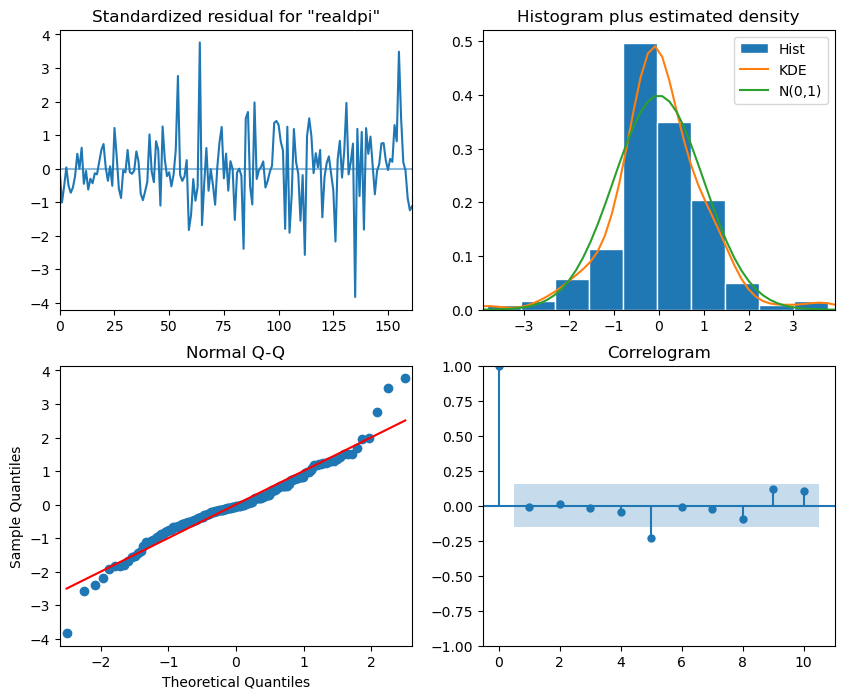

In [11]:
# realdpi
best_model_fit.plot_diagnostics(figsize=(10,8), variable=0);

    Inference : 
        No trend and Constant variance in Residual.
        
        Close to Normal Distribution
        
        Q-Q plot : data is normally distributed
        
        no significant coefficients except at lag 5.

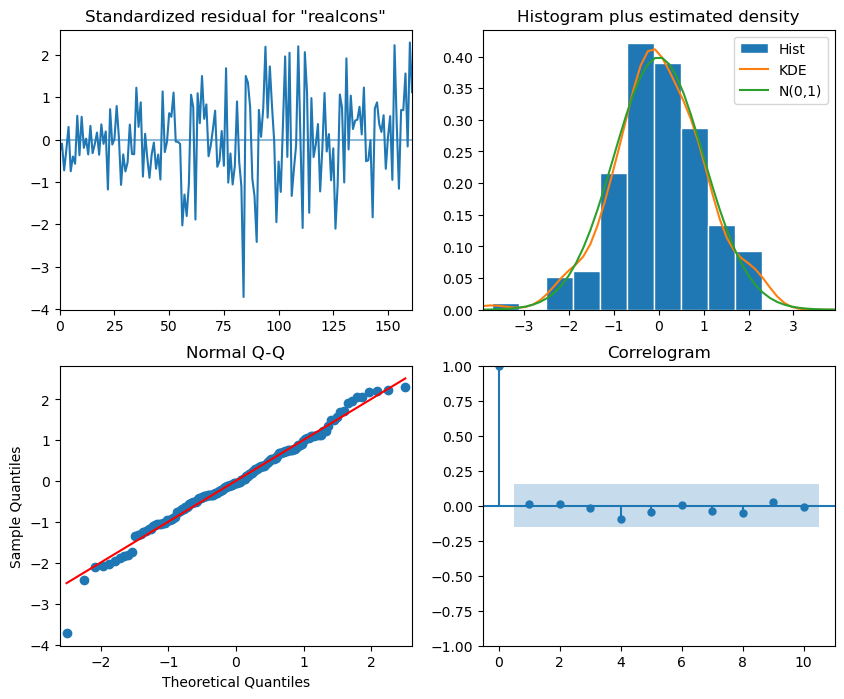

In [12]:
# realcons
best_model_fit.plot_diagnostics(figsize=(10,8), variable=1);

    Inference : 
        No trend and Constant variance in Residual.
        
        Close to Normal Distribution
        
        Q-Q plot : data is normally distributed
    
        No significant autocorrelation coefficients after lag 0.

    After visual analysis, we understood residual of realdpi and residual of realcons closely resemble white noise.

    So we test the residual. (Ljung-Box test)
    
    The Ljung-Box test is a statistical test used to assess whether the residuals (errors) from a time series model exhibit autocorrelation at various lags.
    
    Ho : Residual are Independent and Uncorrelated
        Fail to reject Ho. (p_value > 0.05)

In [13]:
from statsmodels.stats.diagnostic import acorr_ljungbox

realgdp_residuals = best_model_fit.resid['realdpi']

realgdp_residuals_df = pd.DataFrame()

realgdp_residuals_df = acorr_ljungbox(realgdp_residuals, np.arange(1, 11, 1))

realgdp_residuals_df

lb_stat  lb_pvalue
1    0.011627   0.914131
2    0.029381   0.985417
3    0.075807   0.994573
4    0.377925   0.984244
5    9.142603   0.103510
6    9.165437   0.164486
7    9.270191   0.233835
8   10.811656   0.212601
9   13.318183   0.148729
10  15.287457   0.121928

    Inference :
        Residuals of realdpi returns p-values > 0.05.
        Therefore residual are uncorrelated and independent, just like white noise.

In [14]:
realcons_residuals  = best_model_fit.resid['realcons']

realcons_residuals_df = pd.DataFrame()

realcons_residuals_df = acorr_ljungbox(realcons_residuals, np.arange(1, 11, 1))

realcons_residuals_df

lb_stat  lb_pvalue
1   0.023898   0.877145
2   0.068668   0.966249
3   0.068745   0.995304
4   0.235679   0.993579
5   0.377736   0.995921
6   0.787332   0.992409
7   1.015289   0.994578
8   2.150479   0.976048
9   2.437158   0.982526
10  2.442823   0.991683

    Inference :
        Residuals of realdpi returns p-values > 0.05.
        Therefore residual are uncorrelated and independent, just like white noise.

    Lets move on with forecasting!

In [15]:
def recursive_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    
    total_len = train_len + horizon
    end_idx = train_len
    
    if method == 'VAR':

        realdpi_pred_VAR = []
        realcons_pred_VAR = []
        
        for i in range(train_len, total_len, window):
            model = VARMAX(df[:i], order=(3,0))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            
            # Extract the predictions.
            oos_pred_realdpi = predictions.predicted_mean.iloc[-window:]['realdpi']
            oos_pred_realcons = predictions.predicted_mean.iloc[-window:]['realcons']
            
            # Extend the lists with the new predictions for each variable.
            realdpi_pred_VAR.extend(oos_pred_realdpi)
            realcons_pred_VAR.extend(oos_pred_realcons)
        
        return realdpi_pred_VAR, realcons_pred_VAR
    
    elif method == 'last':
        realdpi_pred_last = []
        realcons_pred_last = []
        
        for i in range(train_len, total_len, window):
            
            realdpi_last = df[:i].iloc[-1]['realdpi']
            realcons_last = df[:i].iloc[-1]['realcons']
            
            # Extend the lists with the new predictions for each variable.
            realdpi_pred_last.extend(realdpi_last for _ in range(window))
            realcons_pred_last.extend(realcons_last for _ in range(window))
            
        return realdpi_pred_last, realcons_pred_last

In [16]:
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 4 # Forecast four time steps into the future at a time.

realdpi_pred_VAR, realcons_pred_VAR = recursive_forecast(endog_diff, TRAIN_LEN, HORIZON, WINDOW, 'VAR')

F:\Applications\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
test = endog[163:]

test['realdpi_pred_VAR'] = pd.Series()
test['realdpi_pred_VAR'] = endog.iloc[162]['realdpi'] + np.cumsum(realdpi_pred_VAR)

test['realcons_pred_VAR'] = pd.Series()
test['realcons_pred_VAR'] = endog.iloc[162]['realcons'] + np.cumsum(realcons_pred_VAR)

test

realdpi  realcons  realdpi_pred_VAR  realcons_pred_VAR
163   7887.7    7389.2       7829.223253        7354.324412
164   8053.4    7501.3       7897.186608        7430.254498
165   8135.9    7571.8       7960.560078        7496.628003
166   8222.3    7645.9       8014.752746        7556.613006
167   8234.6    7713.5       8080.698093        7630.994755
168   8296.5    7744.3       8142.386996        7692.841771
169   8273.7    7773.5       8200.117196        7753.860132
170   8484.5    7807.7       8259.354582        7812.526250
171   8385.5    7930.0       8264.378543        7864.626862
172   8611.6    7957.3       8320.850935        7895.051608
173   8658.9    7997.8       8328.693066        7929.111173
174   8629.2    8052.0       8381.999091        7966.035355
175   8649.6    8080.6       8440.208726        7985.383993
176   8681.3    8122.3       8468.412745        8026.958598
177   8812.5    8197.8       8518.078222        8067.781371
178   8935.4    8312.1       8552.937879        8101.189058
179   8986.4    8358.0       8621.581429        8170.380191
180   9025.9    8437.6       8678.234038        8235.650613
181   9115.0    8483.2       8743.376412        8305.232765
182   9175.9    8555.8       8804.527001        8364.950105
183   9303.4    8654.2       8869.782643        8424.512612
184   9189.6    8719.0       8916.900972        8475.211321
185   9253.0    8802.9       8971.245920        8529.157947
186   9308.0    8865.6       9021.999626        8579.322909
187   9358.7    8888.5       9104.023367        8648.337143
188   9533.8    8986.6       9162.360514        8715.118362
189   9617.3    9035.0       9219.720044        8772.932394
190   9662.5    9090.7       9271.404493        8829.764054
191   9788.8    9181.6       9322.768784        8888.400074
192   9830.2    9265.1       9371.262353        8936.532685
193   9842.7    9291.5       9421.495596        8986.408162
194   9883.9    9335.6       9471.729704        9035.602901
195   9886.2    9363.6       9530.477725        9087.386615
196   9826.8    9349.6       9572.789306        9127.794940
197  10059.0    9351.0       9615.968197        9170.805080
198   9838.3    9267.7       9661.275543        9214.739050
199   9920.4    9195.3       9707.017251        9189.075728
200   9926.4    9209.2       9679.931349        9179.563121
201  10077.5    9189.0       9688.375597        9154.617689
202  10040.6    9256.0       9680.987954        9149.918919

In [18]:
realdpi_pred_last, realcons_pred_last = recursive_forecast(endog, TRAIN_LEN, HORIZON, WINDOW, 'last')

test['realdpi_pred_last'] = realdpi_pred_last
test['realcons_pred_last'] = realcons_pred_last

test

realdpi  realcons  realdpi_pred_VAR  realcons_pred_VAR  \
163   7887.7    7389.2       7829.223253        7354.324412   
164   8053.4    7501.3       7897.186608        7430.254498   
165   8135.9    7571.8       7960.560078        7496.628003   
166   8222.3    7645.9       8014.752746        7556.613006   
167   8234.6    7713.5       8080.698093        7630.994755   
168   8296.5    7744.3       8142.386996        7692.841771   
169   8273.7    7773.5       8200.117196        7753.860132   
170   8484.5    7807.7       8259.354582        7812.526250   
171   8385.5    7930.0       8264.378543        7864.626862   
172   8611.6    7957.3       8320.850935        7895.051608   
173   8658.9    7997.8       8328.693066        7929.111173   
174   8629.2    8052.0       8381.999091        7966.035355   
175   8649.6    8080.6       8440.208726        7985.383993   
176   8681.3    8122.3       8468.412745        8026.958598   
177   8812.5    8197.8       8518.078222        8067.781371   
178   8935.4    8312.1       8552.937879        8101.189058   
179   8986.4    8358.0       8621.581429        8170.380191   
180   9025.9    8437.6       8678.234038        8235.650613   
181   9115.0    8483.2       8743.376412        8305.232765   
182   9175.9    8555.8       8804.527001        8364.950105   
183   9303.4    8654.2       8869.782643        8424.512612   
184   9189.6    8719.0       8916.900972        8475.211321   
185   9253.0    8802.9       8971.245920        8529.157947   
186   9308.0    8865.6       9021.999626        8579.322909   
187   9358.7    8888.5       9104.023367        8648.337143   
188   9533.8    8986.6       9162.360514        8715.118362   
189   9617.3    9035.0       9219.720044        8772.932394   
190   9662.5    9090.7       9271.404493        8829.764054   
191   9788.8    9181.6       9322.768784        8888.400074   
192   9830.2    9265.1       9371.262353        8936.532685   
193   9842.7    9291.5       9421.495596        8986.408162   
194   9883.9    9335.6       9471.729704        9035.602901   
195   9886.2    9363.6       9530.477725        9087.386615   
196   9826.8    9349.6       9572.789306        9127.794940   
197  10059.0    9351.0       9615.968197        9170.805080   
198   9838.3    9267.7       9661.275543        9214.739050   
199   9920.4    9195.3       9707.017251        9189.075728   
200   9926.4    9209.2       9679.931349        9179.563121   
201  10077.5    9189.0       9688.375597        9154.617689   
202  10040.6    9256.0       9680.987954        9149.918919   

     realdpi_pred_last  realcons_pred_last  
163             7716.0              7199.9  
164             7716.0              7199.9  
165             7716.0              7199.9  
166             7716.0              7199.9  
167             8135.9              7571.8  
168             8135.9              7571.8  
169             8135.9              7571.8  
170             8135.9              7571.8  
171             8273.7              7773.5  
172             8273.7              7773.5  
173             8273.7              7773.5  
174             8273.7              7773.5  
175             8658.9              7997.8  
176             8658.9              7997.8  
177             8658.9              7997.8  
178             8658.9              7997.8  
179             8812.5              8197.8  
180             8812.5              8197.8  
181             8812.5              8197.8  
182             8812.5              8197.8  
183             9115.0              8483.2  
184             9115.0              8483.2  
185             9115.0              8483.2  
186             9115.0              8483.2  
187             9253.0              8802.9  
188             9253.0              8802.9  
189             9253.0              8802.9  
190             9253.0              8802.9  
191             9617.3              9035.0  
192             9617.3              9035.0  
193             9617.3    

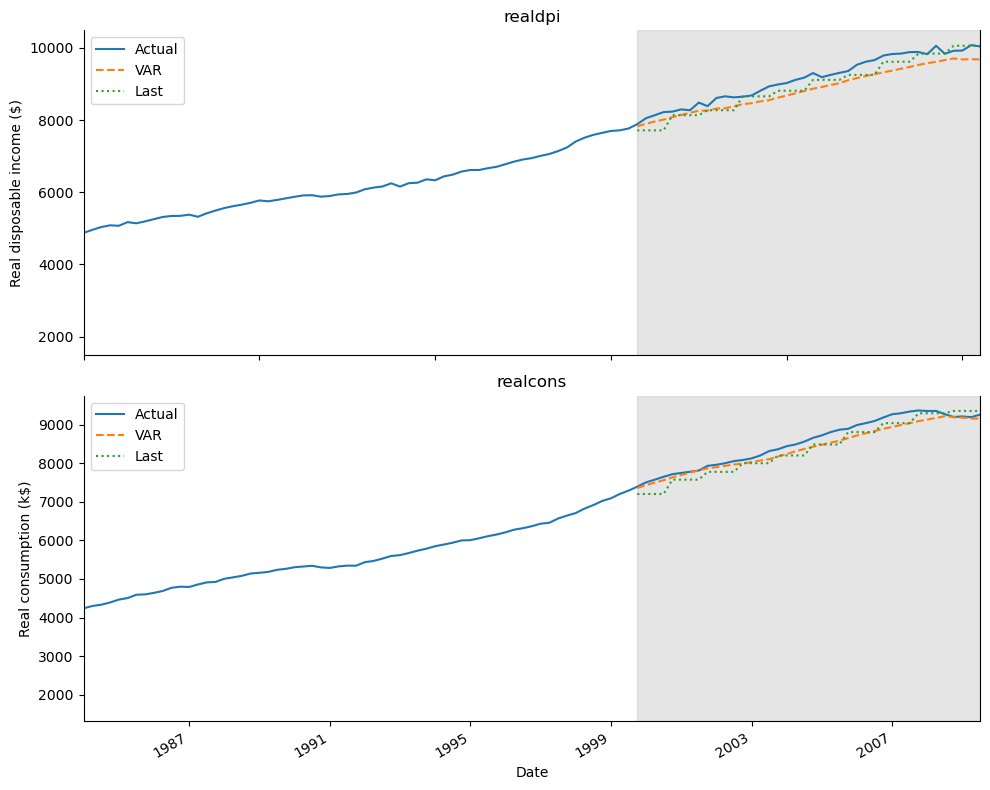

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plotting the data using Seaborn lineplot
sns.lineplot(data=macro_econ_data, x=macro_econ_data.index, y='realdpi', ax=ax1, label='Actual')
sns.lineplot(data=test, x=test.index, y='realdpi_pred_VAR', ax=ax1, linestyle='--', label='VAR')
sns.lineplot(data=test, x=test.index, y='realdpi_pred_last', ax=ax1, linestyle=':', label='Last')
ax1.set_xlabel('Date')
ax1.set_ylabel('Real disposable income ($)')
ax1.set_title('realdpi')
ax1.spines['top'].set_alpha(0)
ax1.axvspan(163, 202, color='#808080', alpha=0.2)
ax1.set_xlim(100, 202)
ax1.legend(loc=2)

sns.lineplot(data=macro_econ_data, x=macro_econ_data.index, y='realcons', ax=ax2, label='Actual')
sns.lineplot(data=test, x=test.index, y='realcons_pred_VAR', ax=ax2, linestyle='--', label='VAR')
sns.lineplot(data=test, x=test.index, y='realcons_pred_last', ax=ax2, linestyle=':', label='Last')
ax2.set_xlabel('Date')
ax2.set_ylabel('Real consumption (k$)')
ax2.set_title('realcons')
ax2.spines['top'].set_alpha(0)
ax2.axvspan(163, 202, color='#808080', alpha=0.2)
ax2.set_xlim(100, 202)
ax2.legend(loc=2)

# Customize x-axis ticks and labels
xticks = np.arange(0, len(macro_econ_data), 16)
xtick_labels = np.arange(1959, 2010, 4)
plt.xticks(xticks, xtick_labels)
plt.xlim(100, 202)

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

In [20]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [21]:
mape_realdpi_VAR = mape(test['realdpi'], test['realdpi_pred_VAR'])
mape_realdpi_last = mape(test['realdpi'], test['realdpi_pred_last'])

mape_realcons_VAR = mape(test['realcons'], test['realcons_pred_VAR'])
mape_realcons_last = mape(test['realcons'], test['realcons_pred_last'])

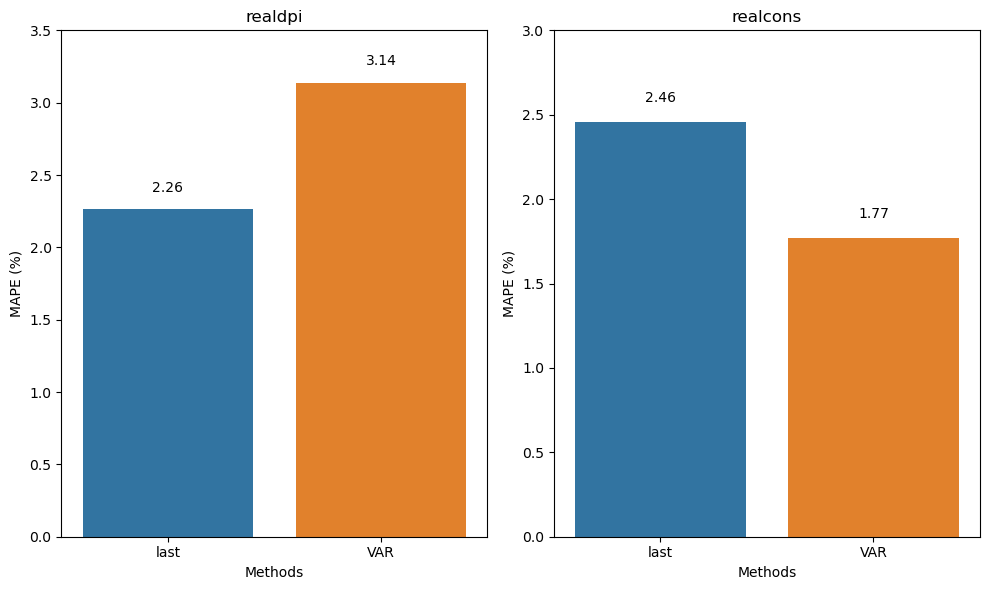

In [22]:
x = ['last', 'VAR']
y1 = [mape_realdpi_last, mape_realdpi_VAR]
y2 = [mape_realcons_last, mape_realcons_VAR]

plt.figure(figsize=(10, 6))

# Create the first subplot for 'realdpi'
plt.subplot(1, 2, 1)
ax = sns.barplot(x=x, y=y1)
plt.xlabel('Methods')
plt.ylabel('MAPE (%)')
plt.title('realdpi')
plt.ylim(0, 3.5)

# Add data labels above the bars for the first subplot ('realdpi')
for index, value in enumerate(y1):
    ax.text(index, value + 0.1, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Create the second subplot for 'realcons'
plt.subplot(1, 2, 2)
ax = sns.barplot(x=x, y=y2)
plt.xlabel('Methods')
plt.ylabel('MAPE (%)')
plt.title('realcons')
plt.ylim(0, 3)

# Add data labels above the bars for the second subplot ('realcons')
for index, value in enumerate(y2):
    ax.text(index, value + 0.1, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Show the plot
plt.show()

    The MAPE of the forecast for realdpi and realcons. 
    
    You can see that the VAR(3) model performs worse than the baseline in the case of realdpi. 
    However, the VAR(3) model performs better than the baseline for realcons.